In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import LabelEncoder

In [2]:
frame = pd.read_csv('clean data\\clean_data_train.csv')
frame_test = pd.read_csv('clean data/clean_data_test.csv')
frame.head()

,Gia,Dia chi,Dien tich,Gia/m²,Huong dat,Loai hinh dat,Chieu ngang,Chieu dai,Quan
0,3.15,"Lô 46 B2.96, Hói Kiểng 30, Phường Hoà Quý, Quậ...",100.0,31.50,Tây Bắc,Đất nền dự án,5.0,20.0,Ngũ Hành Sơn
1,2.50,"Ngô Quyền, Phường Mân Thái, Quận Sơn Trà, Đà Nẵng",79.0,31.65,Đông Nam,Đất thổ cư,6.0,14.0,Sơn Trà
2,2.10,"13, Đường Lạc Long Quân, Phường Hòa Khánh Bắc,...",125.0,16.80,Đông Bắc,Đất thổ cư,4.2,31.0,Liên Chiểu
3,5.90,"Lê Hiến Mai, Phường Hòa An, Quận Cẩm Lệ, Đà Nẵng",220.0,26.82,Tây Nam,Đất thổ cư,10.0,22.0,Cẩm Lệ
4,3.50,"Đường Trần Thúc Nhẫn, Phường Hòa Xuân, Quận Cẩ...",88.0,39.77,Đông Bắc,Đất thổ cư,5.0,17.5,Cẩm Lệ


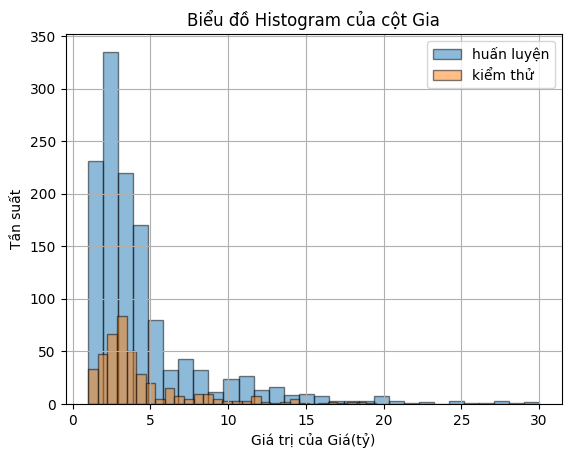

In [6]:
plt.hist(frame['Gia'], bins=30, alpha=0.5, label='huấn luyện', edgecolor='black')
plt.hist(frame_test['Gia'], bins=30, alpha=0.5, label='kiểm thử', edgecolor='black')

plt.title('Biểu đồ Histogram của cột Gia')
plt.xlabel('Giá trị của Giá(tỷ)')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(True)
plt.show()

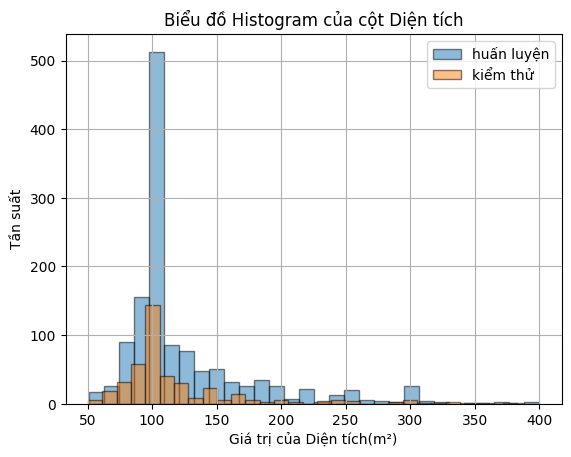

In [7]:
plt.hist(frame['Dien tich'], bins=30, alpha=0.5, label='huấn luyện', edgecolor='black')
plt.hist(frame_test['Dien tich'], bins=30, alpha=0.5, label='kiểm thử', edgecolor='black')

plt.title('Biểu đồ Histogram của cột Diện tích')
plt.xlabel('Giá trị của Diện tích(m²)')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(True)
plt.show()

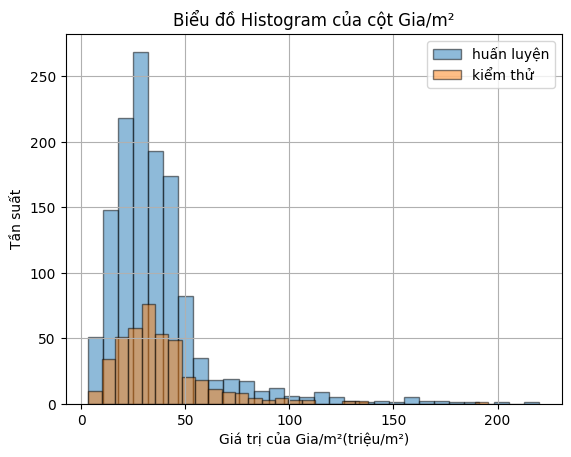

In [8]:
plt.hist(frame['Gia/m²'], bins=30, alpha=0.5, label='huấn luyện', edgecolor='black')
plt.hist(frame_test['Gia/m²'], bins=30, alpha=0.5, label='kiểm thử', edgecolor='black')

plt.title('Biểu đồ Histogram của cột Gia/m²')
plt.xlabel('Giá trị của Gia/m²(triệu/m²)')
plt.ylabel('Tần suất')
plt.legend()
plt.grid(True)
plt.show()

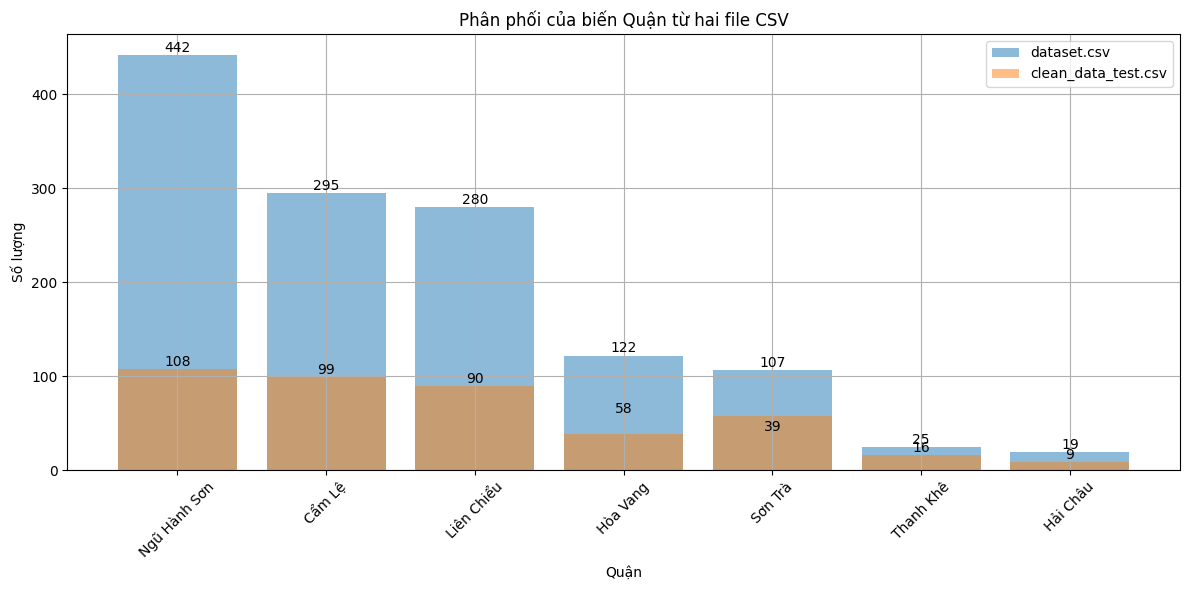

In [11]:
district_counts_frame = frame['Quan'].value_counts()
district_counts_frame_test = frame_test['Quan'].value_counts()

# Vẽ bar plot cho số lượng mẫu trong mỗi quận từ mỗi tập dữ liệu
plt.figure(figsize=(12, 6))
plt.bar(district_counts_frame.index, district_counts_frame.values, alpha=0.5, label='dataset.csv')
plt.bar(district_counts_frame_test.index, district_counts_frame_test.values, alpha=0.5, label='clean_data_test.csv')

# Thêm giá trị vào mỗi cột
for i, value in enumerate(district_counts_frame.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
for i, value in enumerate(district_counts_frame_test.values):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom')

plt.title('Phân phối của biến Quận từ hai file CSV')
plt.xlabel('Quận')
plt.ylabel('Số lượng')
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

- **Quan**: địa chỉ quận/huyện của đất nền

### Tương quan giữa biến hướng đất và giá

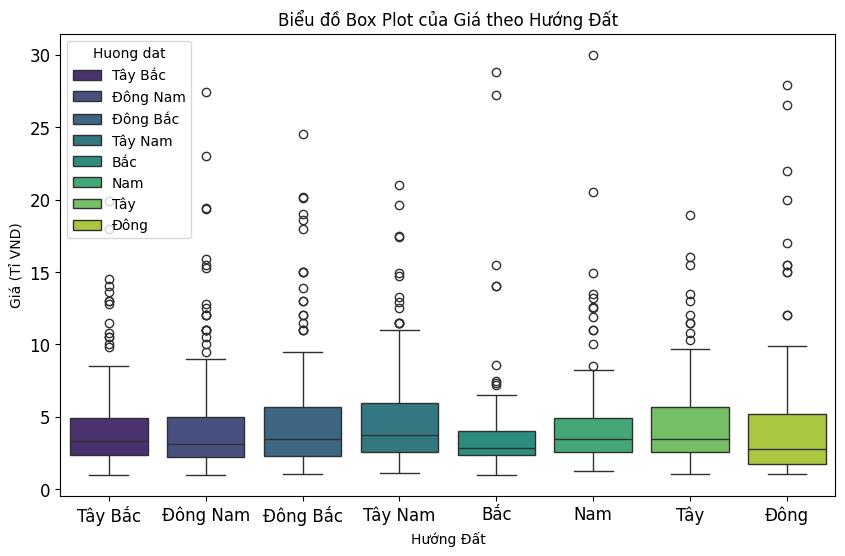

In [3]:
plt.figure(figsize=(10, 6))

# Sử dụng palette để áp dụng một loạt màu cho các box
sns.boxplot(x='Huong dat', y='Gia', hue='Huong dat', data=frame, palette='viridis')
plt.title('Biểu đồ Box Plot của Giá theo Hướng Đất')
plt.xlabel('Hướng Đất')
plt.ylabel('Giá (Tỉ VND)')
# plt.xticks(rotation=45)  # Xoay nhãn x để dễ đọc
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Trung vị (median) tập trung gần phía của tứ phân vị thứ nhất (Q1)
- Ngoại lệ rất nhiều ở các hướng

### Tương quan giữa diện tích và giá

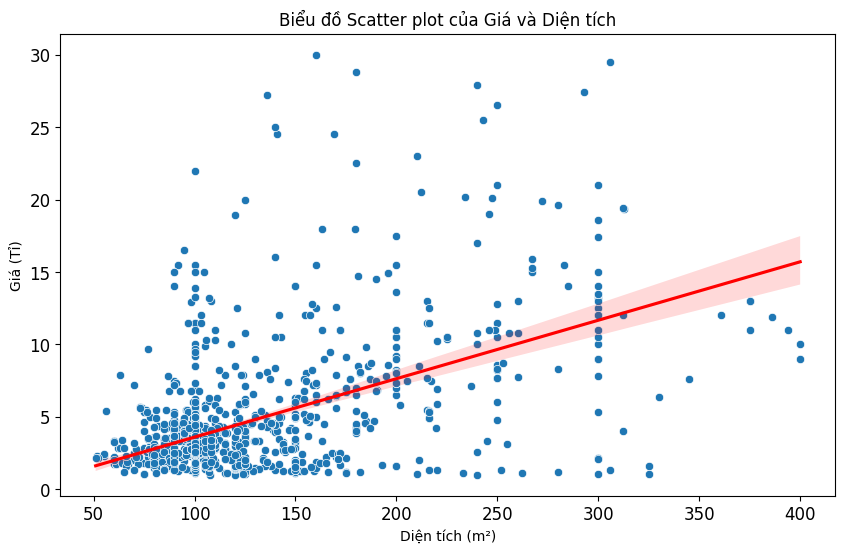

In [4]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Dien tich', y='Gia', data=frame)
sns.regplot(x='Dien tich', y='Gia', data=frame, scatter=False, color='red')  # Thêm đường trendline
plt.title('Biểu đồ Scatter plot của Giá và Diện tích')
plt.xlabel('Diện tích (m²)')
plt.ylabel('Giá (Tỉ)')
plt.grid(True, linewidth=0)  # Bỏ đường kẻ giữa các trục
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Khi giá trị của “Diện tích” tăng, giá trị của “Giá” cũng tăng theo. Đường màu đỏ chỉ ra xu hướng này.
- Dữ liệu tập trung chủ yếu ở phần dưới của cả hai trục.
- Có một số điểm ngoại lệ nằm xa khỏi đường xu hướng.

### Tương quan giữa Giá và Giá/m²

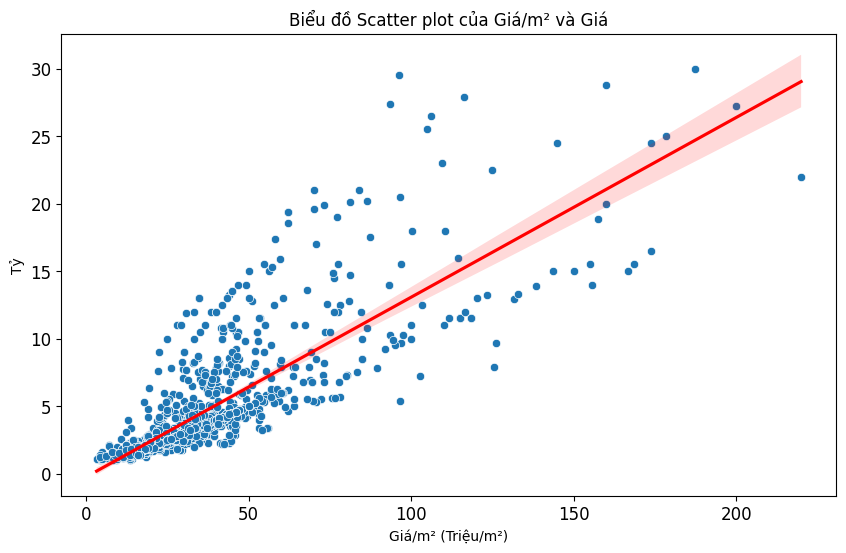

In [5]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Gia/m²', y='Gia', data=frame)
sns.regplot(x='Gia/m²', y='Gia', data=frame, scatter=False, color='red')
plt.title('Biểu đồ Scatter plot của Giá/m² và Giá')
plt.xlabel('Giá/m² (Triệu/m²)')
plt.ylabel('Tỷ')
plt.grid(True, linewidth=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Khi giá trị của “Giá/m²” tăng, giá trị của “Giá” cũng tăng theo. Đường màu đỏ chỉ ra xu hướng này.
- Dữ liệu tập trung chủ yếu ở phần dưới của cả hai trục.
- Có một số điểm ngoại lệ nằm xa khỏi đường xu hướng.

### Tương quan giữa loại hình đất và giá

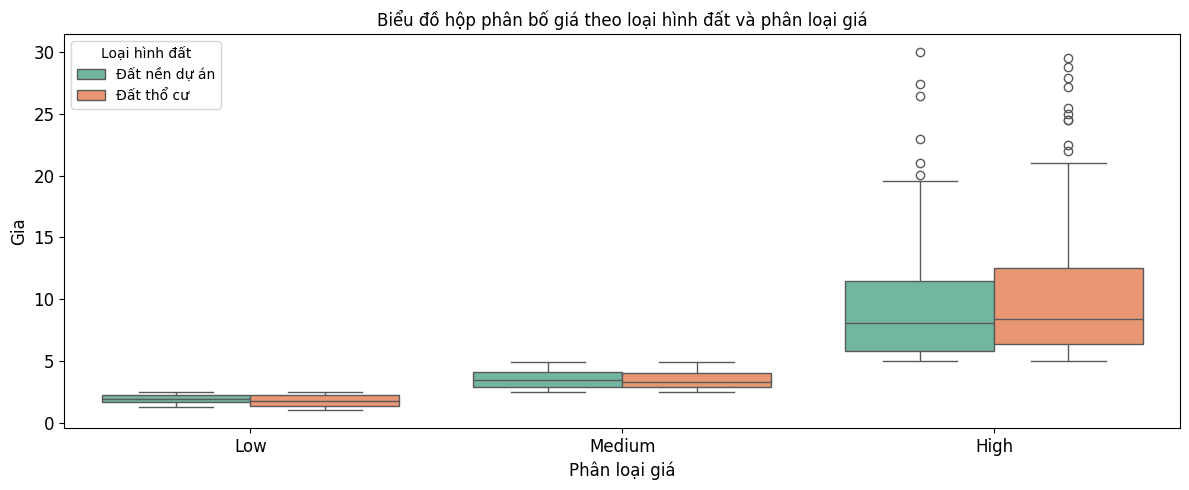

In [6]:
def categorize_price(price):
    if price >= 5:
        return "High"
    elif price >= 2.5:
        return "Medium"
    else:
        return "Low"
frame["Price Category"] = frame["Gia"].apply(categorize_price)
price_category_order = ["Low", "Medium", "High"]
plt.figure(figsize=(12, 5))
sns.boxplot(
    data=frame,
    x="Price Category",
    y="Gia",
    hue="Loai hinh dat",
    palette="Set2",
    order=price_category_order
)
plt.title("Biểu đồ hộp phân bố giá theo loại hình đất và phân loại giá")
plt.xlabel("Phân loại giá", fontsize=12)
plt.ylabel("Gia", fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title="Loại hình đất")
plt.tight_layout()
plt.show()


- Phân phối giá của 2 loại hình đất **Đất thổ cư, Đất nền dự án** là gần như tương đồng
- Ở mức giá cao thì **Đất thổ cư** có nhỉn hơn một chút nhưng không đáng kể 


### Tương quan giữa quận và giá

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


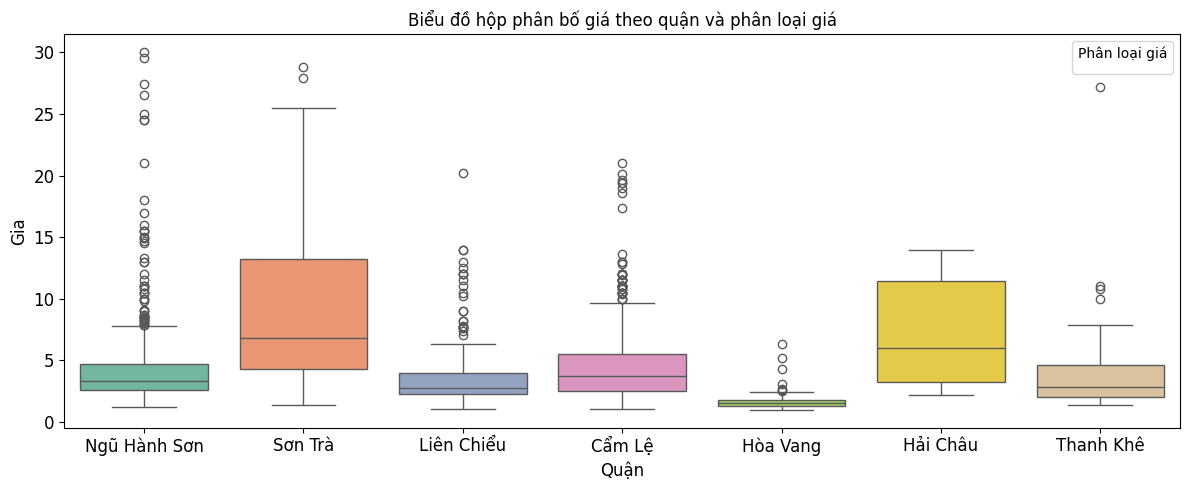

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Tạo DataFrame từ dữ liệu
# Giả sử frame là DataFrame của bạn đã được xác định trước

# Tạo biểu đồ hộp (box plot)
plt.figure(figsize=(12, 5))
sns.boxplot(
    data=frame,
    x='Quan',
    y='Gia',
    hue='Quan',
    palette='Set2'
)

# Thiết lập tiêu đề, nhãn trục và định dạng cho biểu đồ
plt.title('Biểu đồ hộp phân bố giá theo quận và phân loại giá')
plt.xlabel('Quận', fontsize=12)
plt.ylabel('Gia', fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.legend(title='Phân loại giá')

# Hiển thị biểu đồ
plt.tight_layout()
plt.show()


- **Hải Châu, Sơn trà** là những quận tập trung nhiều đất nền có giá cao 
- **Hòa Vang** là quận tập trung nhiều đất nền có giá thấp

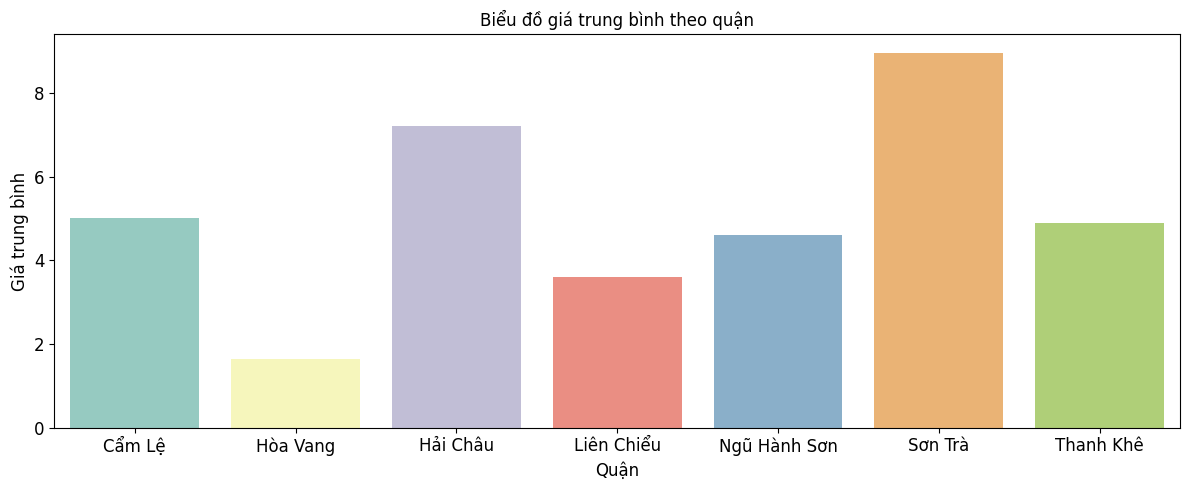

In [8]:
grouped_data = frame.groupby('Quan')['Gia'].agg(['mean', 'std']).reset_index()
plt.figure(figsize=(12, 5))
sns.barplot(
    data=grouped_data,
    x='Quan',
    y='mean',
    palette='Set3',
    hue='Quan'
)
plt.title("Biểu đồ giá trung bình theo quận")
plt.xlabel("Quận", fontsize=12)
plt.ylabel("Giá trung bình", fontsize=12)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()
plt.show()


- Mức **giá** thay đổi theo vị trí của đất nền

### Tương quan giữa chiều dài và giá

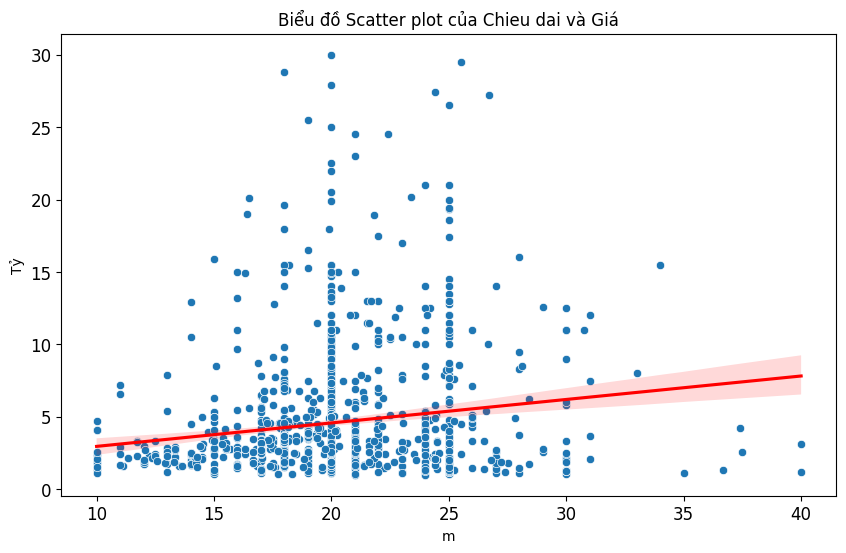

In [9]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Chieu dai', y='Gia', data=frame)
sns.regplot(x='Chieu dai', y='Gia', data=frame, scatter=False, color='red')
plt.title('Biểu đồ Scatter plot của Chieu dai và Giá')
plt.xlabel('m')
plt.ylabel('Tỷ')
plt.grid(True, linewidth=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Khi **Chiều dai** tăng thì **Giá** tăng theo. Tỉ lệ thuận không mạnh




### Tương quan giữa chiều ngang và giá

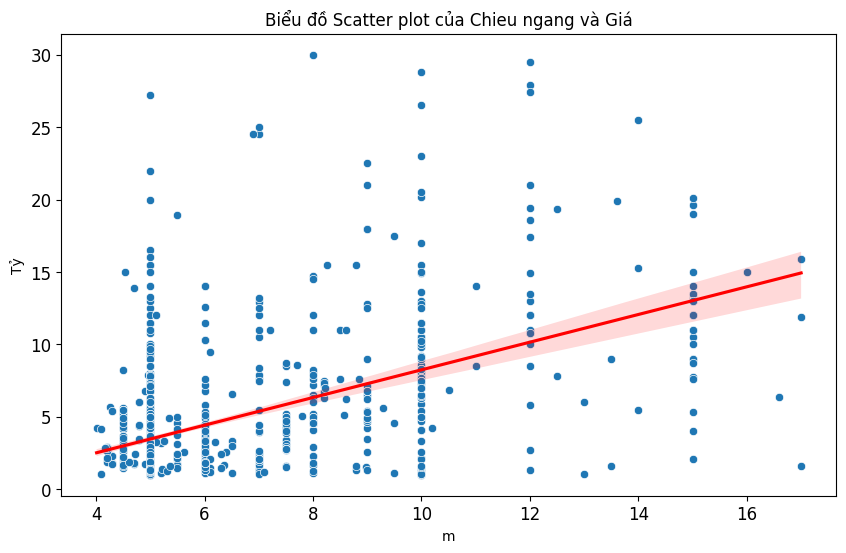

In [10]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Chieu ngang', y='Gia', data=frame)
sns.regplot(x='Chieu ngang', y='Gia', data=frame, scatter=False, color='red')
plt.title('Biểu đồ Scatter plot của Chieu ngang và Giá')
plt.xlabel('m')
plt.ylabel('Tỷ')
plt.grid(True, linewidth=0)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

- Khi **Chiều ngang** tăng thì **Giá** tăng theo. Tỉ lệ thuận khá mạnh



### Kết Luận

- Biến mục tiêu **giá** sẽ không bị ảnh hưởng bởi biến **Loai hinh dat**
- Và có thể dùng biến **Dien tich**, **Gia/m²**, **Huong Dat**, **Chieu dai**, **Chieu rong**, **Quan** để dự đoán biến mục tiêu **Gia**